In [9]:
import numpy as np
import pandas as pd
import os

In [10]:
os.getcwd()

'C:\\Users\\rasheen1\\Documents\\Data Science\\Python A-Z Krill Course\\Lecture 5'

In [11]:
os.chdir('C:\\Users\\rasheen1\\Documents\\Data Science\\Python A-Z Krill Course\\Lecture 5')

In [12]:
os.getcwd()

'C:\\Users\\rasheen1\\Documents\\Data Science\\Python A-Z Krill Course\\Lecture 5'

In [13]:
movies=pd.read_csv("P4-Movie-Ratings.csv")

In [14]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [15]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [16]:
movies.columns = ['Film', 'Genre', 'CriticsRatings', 'AudienceRatings', 'BudgetMillion', 'Year']

In [17]:
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillion      559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [18]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillion      559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [20]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

movies.head()

In [21]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [17]:
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


-----------------------

In [18]:
# Charts

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

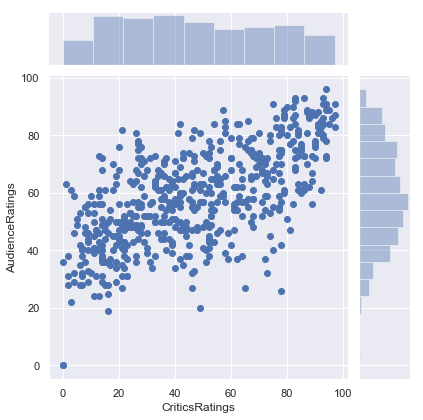

In [27]:
# joint plots shows distrubution of each variable along with relationship
j = sns.jointplot(data = movies, x='CriticsRatings', y='AudienceRatings')

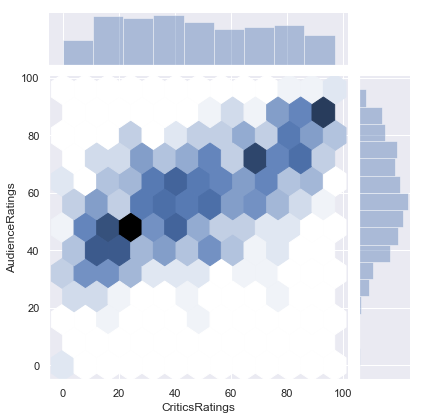

In [31]:
j = sns.jointplot(data = movies, x='CriticsRatings', y='AudienceRatings', kind='hex')

--------

In [32]:
# Histograms

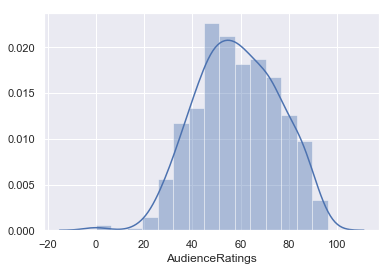

In [39]:
# Already discussed method using seaborn
# seaborn histograms
sns.set_style('darkgrid')
m1 = sns.distplot(movies.AudienceRatings, bins=15)
# we can see the audience rating is sort of normally distrubuted. This coincides with the fact that when we have
# 1000s of people rating something emotionally it tends to distribute normally. 
#however when critics rate a movie based on certain criterian, sounds effects, lightings etc. it tends to 
# to be uniform distribution.

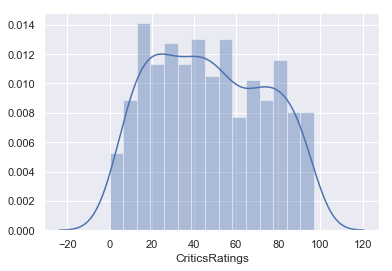

In [34]:
m2 = sns.distplot(movies.CriticsRatings, bins=15)

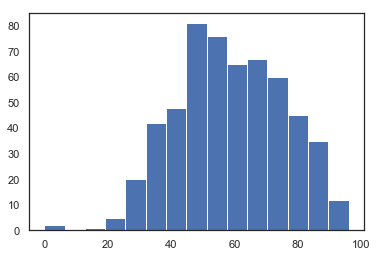

In [48]:
# matplotlib pyplots on which seaborn is based
sns.set_style('white')
n1 = plt.hist(movies.AudienceRatings, bins=15)

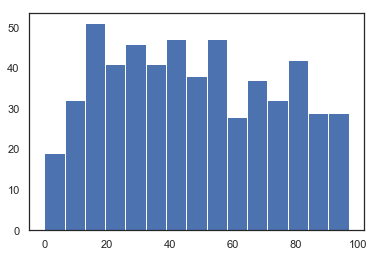

In [42]:
n1 = plt.hist(movies.CriticsRatings, bins=15)

----

In [49]:
# Stacked Histograms

In [51]:
# we want to plot budget in millions foe each Genre

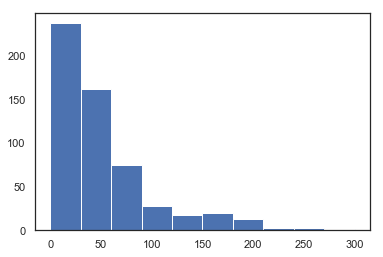

In [53]:
plt.hist(movies.BudgetMillion)
plt.show()

In [56]:
movies[movies.Genre == 'Action'].head() # Filter data set where Genre is action

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillion,Year
2,12 Rounds,Action,30,52,20,2009
5,2012,Action,39,63,200,2009
15,Abduction,Action,4,46,35,2011
29,Appaloosa,Action,77,55,20,2008
30,Armored,Action,40,34,20,2009


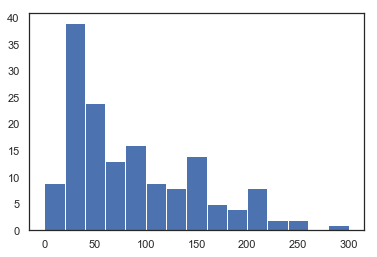

In [63]:
h = movies[movies.Genre == 'Action'].BudgetMillion # show only BudgetMillion column
plt.hist(h, bins=15)
plt.show()

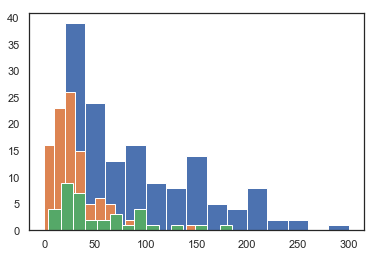

In [72]:
plt.hist(movies[movies.Genre =='Action'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre =='Drama'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre =='Thriller'].BudgetMillion, bins=15)
plt.show()

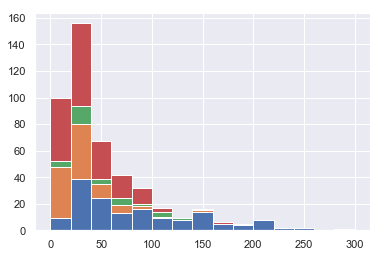

In [79]:
sns.set_style('darkgrid')
plt.hist([movies[movies.Genre == 'Action'].BudgetMillion, \
          movies[movies.Genre == 'Drama'].BudgetMillion, \
          movies[movies.Genre == 'Thriller'].BudgetMillion, \
          movies[movies.Genre == 'Comedy'].BudgetMillion],\
          stacked=True, bins=15)
plt.show()

In [86]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

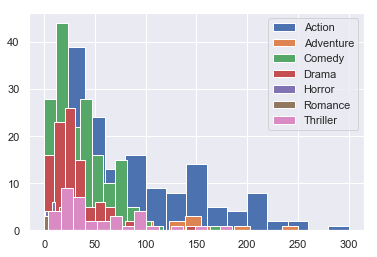

In [96]:
for i in movies.Genre.cat.categories:
    plt.hist(movies[movies.Genre == i].BudgetMillion, stacked=True, bins =15, label=i)
plt.legend()
plt.show()

In [97]:
# the above isn't stacked, for stacked we will need to use a list

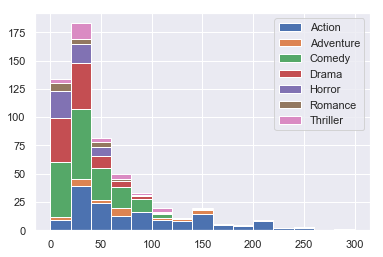

In [108]:
list2= []
labels=list() # Two approches to define an empty list. 
for i in movies.Genre.cat.categories:
    list2.append(movies[movies.Genre == i].BudgetMillion)
    labels.append(i)
plt.hist(list2, stacked=True, bins=15, label=labels, rwidth=1)
plt.legend()
plt.show()

---------


In [109]:
# KDE plot - Kernel Density Estimate

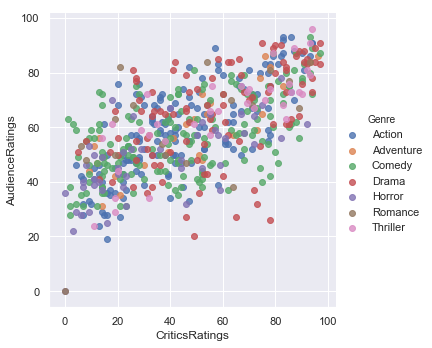

In [116]:
# normal scatter plot from before
s1 = sns.lmplot(data = movies, x ='CriticsRatings', y ='AudienceRatings', fit_reg= False, hue='Genre')

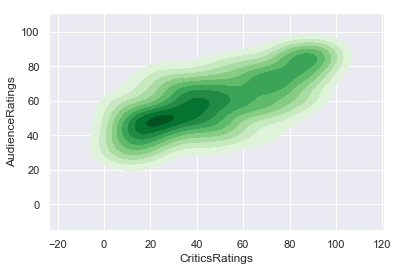

In [125]:
k1 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Greens' )

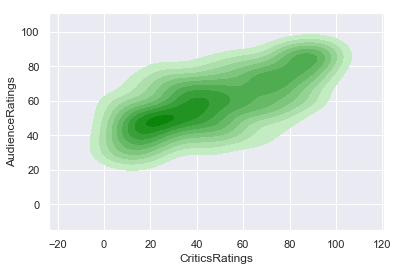

In [127]:
k1 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings, shade=True, shade_lowest=False, color='g' )

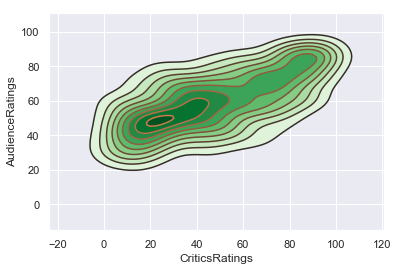

In [130]:
k1 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings, shade=True, shade_lowest=False, cmap='Greens' )
# use another kdeplot for outlines
k1 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings,  )

----

In [131]:
#subplots function

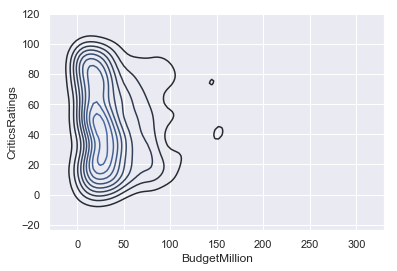

In [132]:
k1 = sns.kdeplot(movies.BudgetMillion, movies.CriticsRatings)

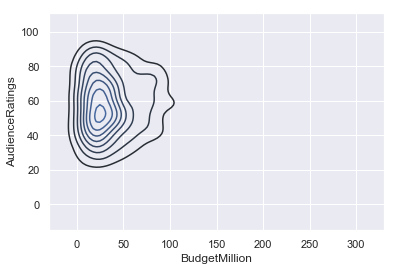

In [133]:
k2 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings)

[(-20, 160)]

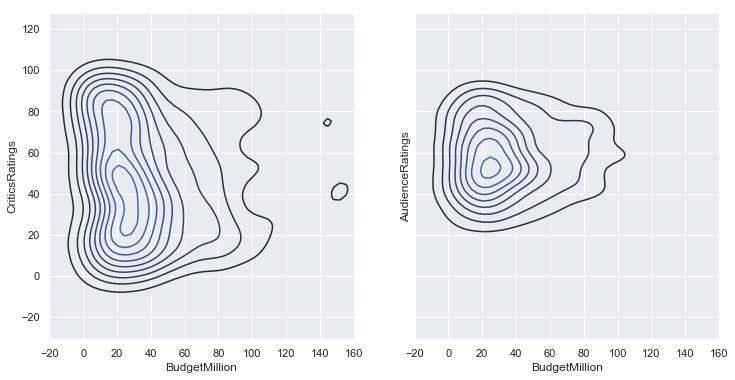

In [144]:
f, axis = plt.subplots(1,2, figsize=(12,6),sharex=True, sharey=True) # axis is 1 row 2 columns can define more as well
k1 = sns.kdeplot(movies.BudgetMillion, movies.CriticsRatings, ax = axis[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings, ax = axis[1])
k2.set(xlim=(-20,160))

--------

In [145]:
#Violin plots

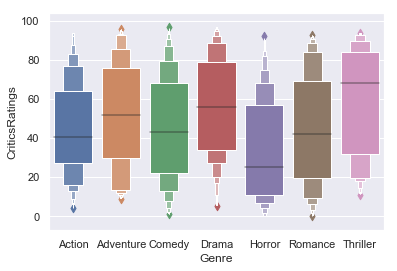

In [146]:
z = sns.boxenplot(data=movies, x='Genre' , y='CriticsRatings')


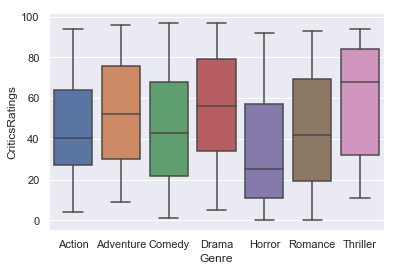

In [148]:
z1 = sns.boxplot(data=movies, x='Genre' , y='CriticsRatings')


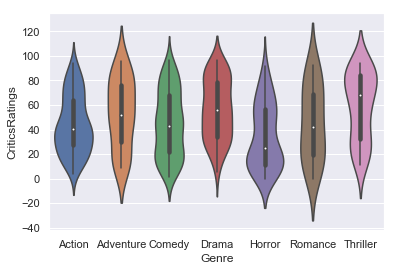

In [149]:
z2 = sns.violinplot(data=movies, x='Genre', y='CriticsRatings')

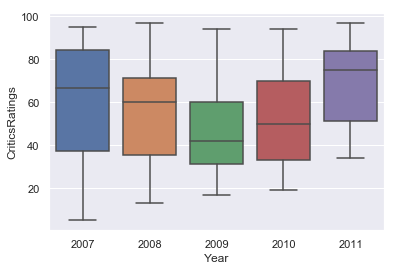

In [151]:
z3 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticsRatings')
# each box plot shows quartiles, shorter the quartile, more concentration of points in the quartile

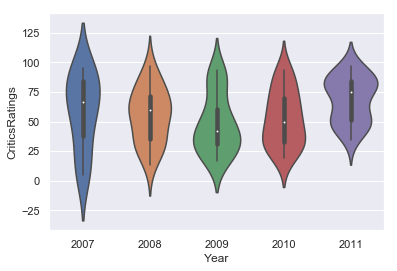

In [153]:
z4 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticsRatings')
#width of the violin plot shows concentration of points

---

In [171]:
# Facet Grid - it splits the charts into rows and columns for individual analysis. 
# like scatter plot or lmplot for ratings split into different Genre and years

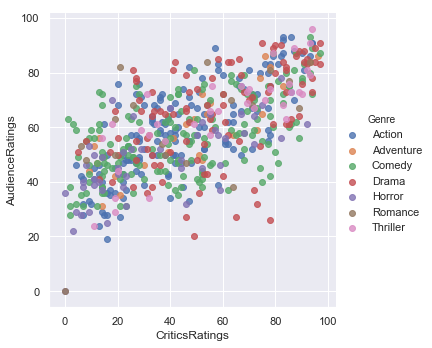

In [161]:
sns.lmplot(data= movies, x='CriticsRatings', y='AudienceRatings', hue='Genre', fit_reg= False)

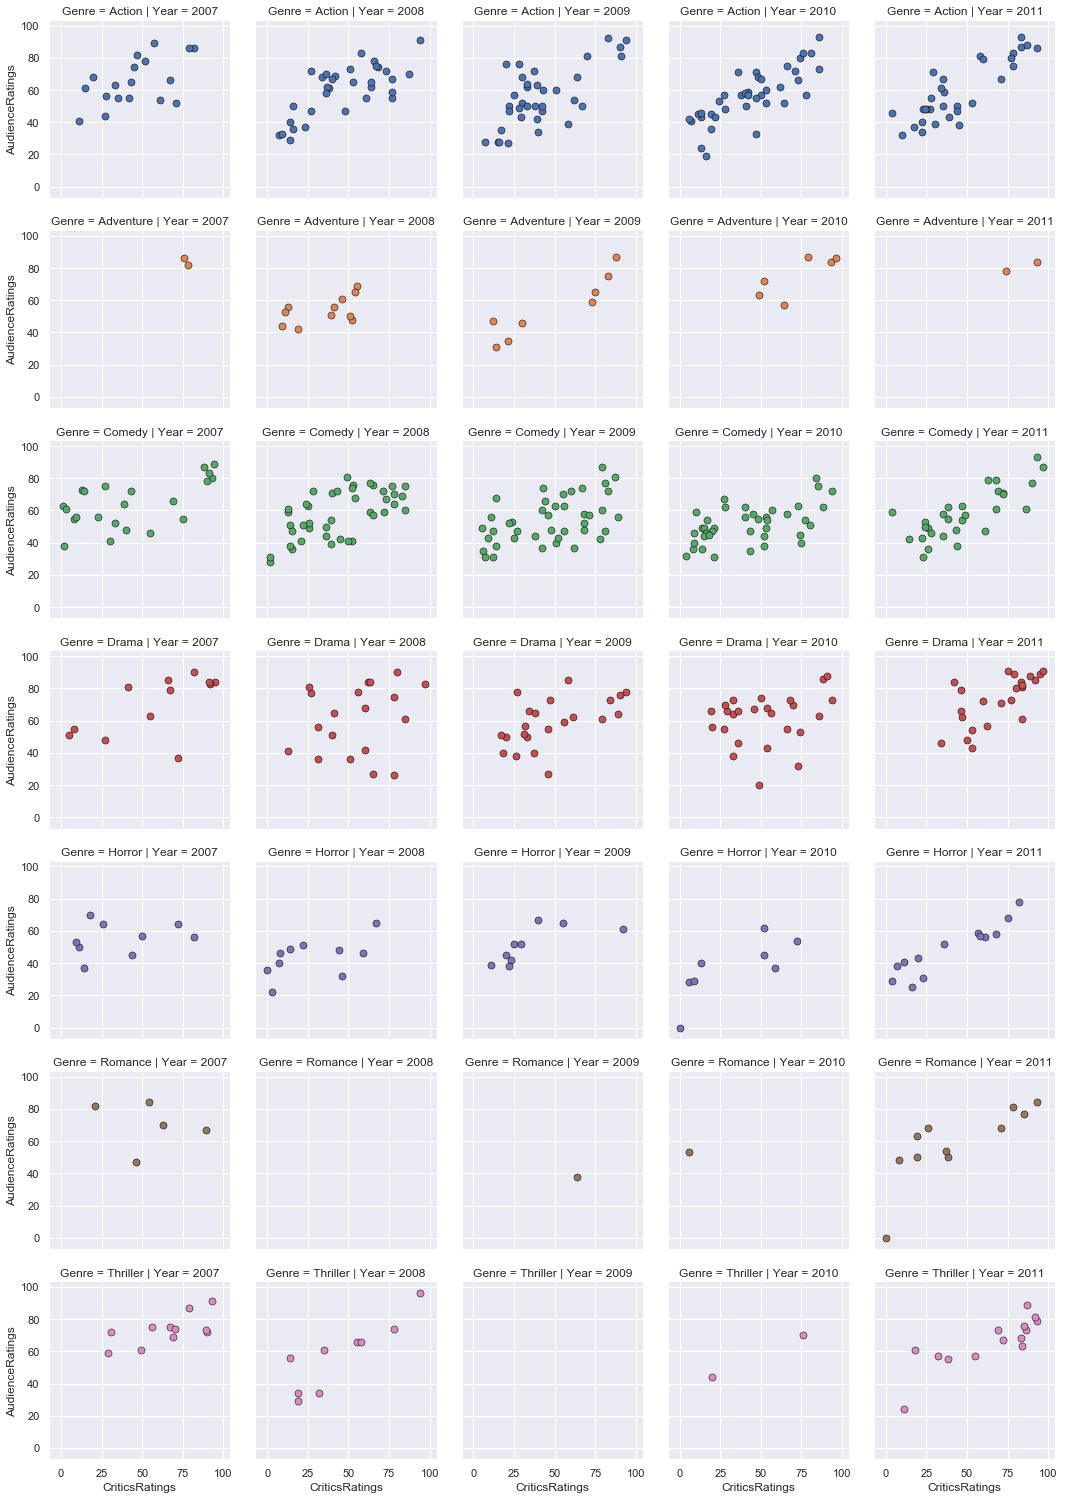

In [169]:
g = sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
kws= dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(sns.scatterplot, 'CriticsRatings', 'AudienceRatings', **kws)

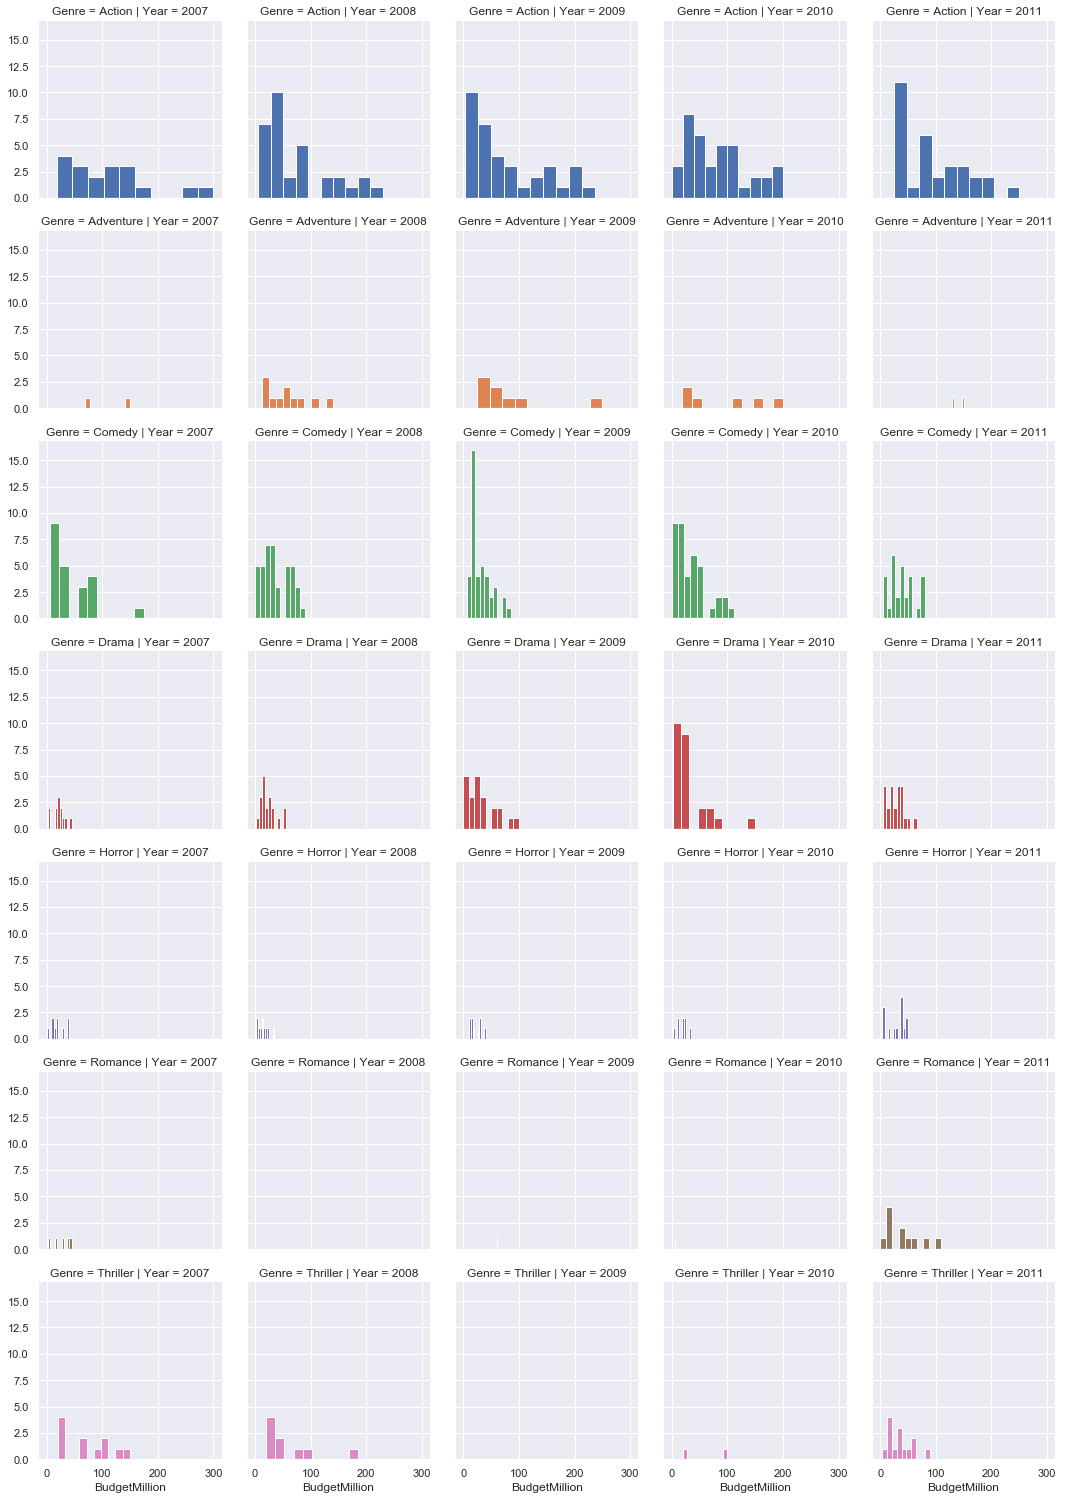

In [182]:
g = sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillion')

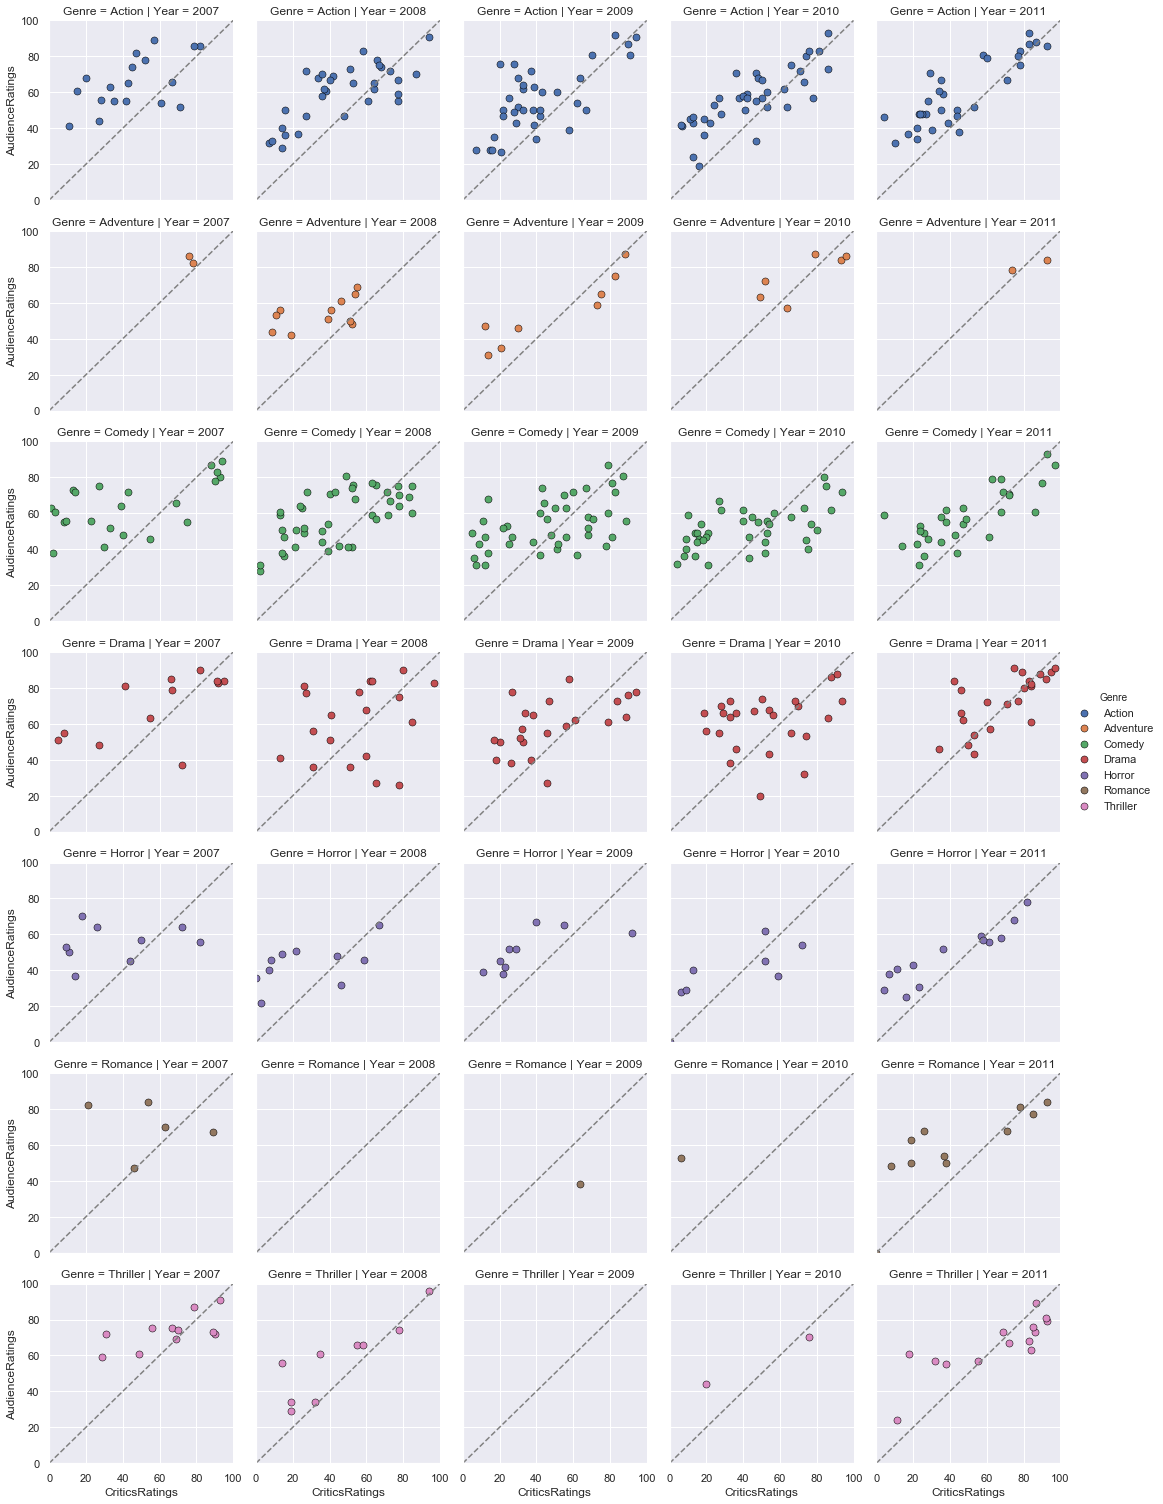

In [26]:
# Controlling Axes and Adding diagonals
g = sns.FacetGrid(data=movies, row='Genre', col='Year', hue='Genre')
kws= dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(sns.scatterplot, 'CriticsRatings', 'AudienceRatings', **kws)
g.set(xlim=(0,100), ylim=(0,100))
# to add diagonals we need to iterate over each plot in facetgrid
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
#add legend
g.add_legend()

-----

In [12]:
# strftime() to convert and mainupulate date and time

In [13]:
from datetime import datetime

In [14]:
now1 = datetime.now()
date = now1.strftime('%Y-%m-%d')
print(date)

2019-07-15


In [15]:
date_time = now1.strftime('%Y:%m:%d, %H:%M:%S')
print(date_time)

2019:07:15, 11:28:50


--------------

In [27]:
# Building a Dashboard

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

[(-20, 160)]

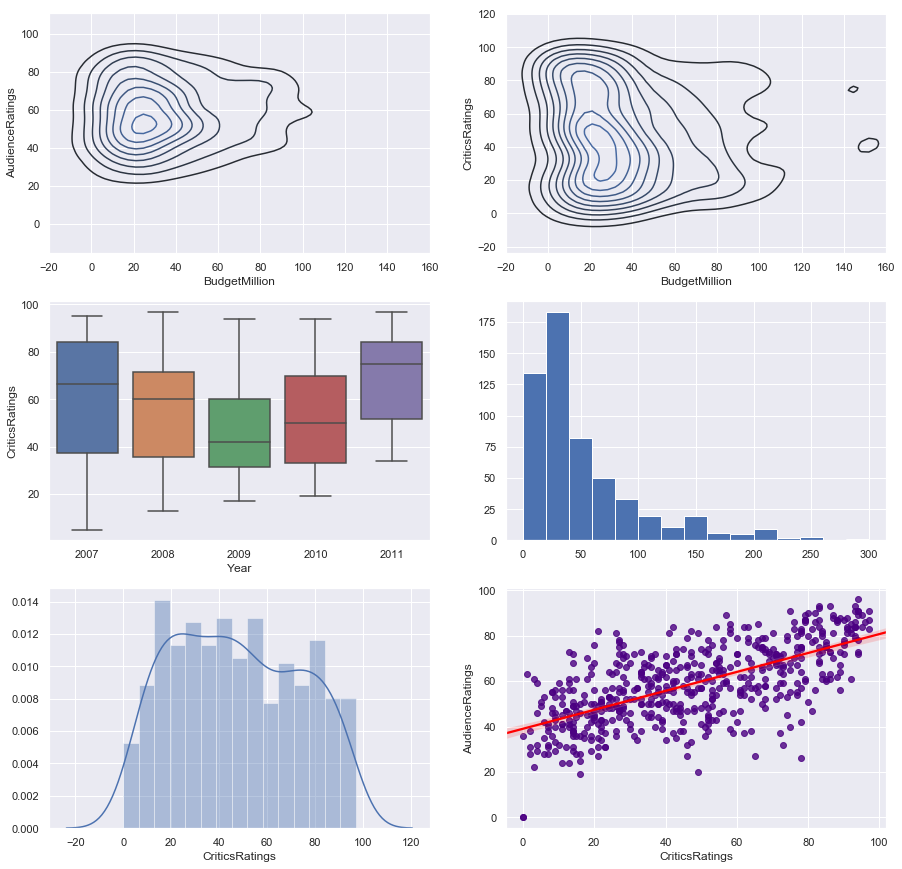

In [79]:
f, axis = plt.subplots(3,2, figsize=(15,15))
# plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings, ax=axis[0,0])

# plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticsRatings, ax=axis[0,1])
# plot [1,0]
k3 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticsRatings', ax=axis[1,0])

#To plot a pyplot chart in subplots, axis needs to be defined differently as below:
# plot [1,1]
k4 = axis[1,1].hist(x=movies.BudgetMillion, bins=15)

# plot [2,0]

k5 = sns.distplot(movies.CriticsRatings, bins=15, ax=axis[2,0])
#k6 = sns.lmplot(data=movies, x='CriticsRatings', y='AudienceRatings', hue='Genre', ax=axis[2,1])
# lmplot() doesn't take axis because it is figure-level function, which 
# cretates it's own figure that is managed through FacetGrid
# regplot() is an axes-level function, so it draws directly onto an axes 
# (either the currently active axes or the one provided by the ax parameter)
#  lmplot() uses regplot() internally and takes most of its parameters

# # plot [2,1]

k6 = sns.regplot(data=movies, x='CriticsRatings', y='AudienceRatings', color='indigo',\
                 line_kws = {'color' :'red'}, ax=axis[2,1])
                   
                   
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

In [80]:
# styling the grid

[(-20, 160)]

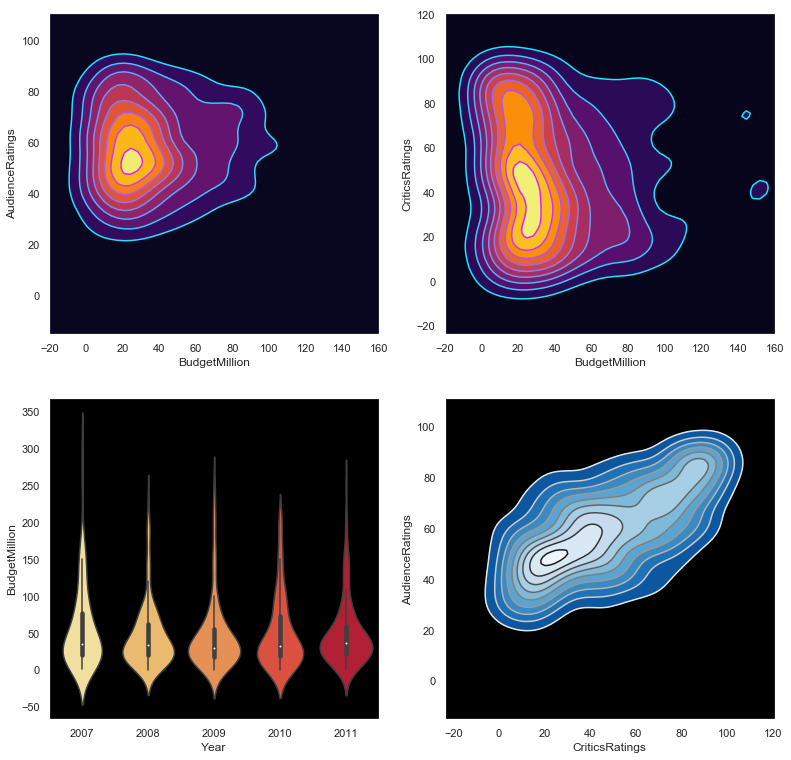

In [129]:
#sns.set_style = ('dark', {'axes.facecolor':'black'})
sns.set(context='notebook', style='dark', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc ={'axes.facecolor':'black'})

f, axis = plt.subplots(2,2, figsize=(13,13))

# plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings, shade= True, shade_lowest=True,\
                 cmap='inferno', ax=axis[0,0])
k1b = sns.kdeplot(movies.BudgetMillion, movies.AudienceRatings, cmap='cool', ax=axis[0,0])

# plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticsRatings, shade=True, shade_lowest=True,\
                 cmap='inferno', ax=axis[0,1])
k2b = sns.kdeplot(movies.BudgetMillion, movies.CriticsRatings, cmap='cool', ax=axis[0,1])

# plot [1,0]
k3 = sns.violinplot(data=movies, x='Year', y='BudgetMillion', ax=axis[1,0], \
                   palette= 'YlOrRd')

# plot [1,1]
k4 = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings, shade=True, shade_lowest=False, \
                cmap='Blues_r', ax=axis[1,1])
k4b = sns.kdeplot(movies.CriticsRatings, movies.AudienceRatings, cmap='gist_gray_r', ax=axis[1,1])
 
                   
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

-----

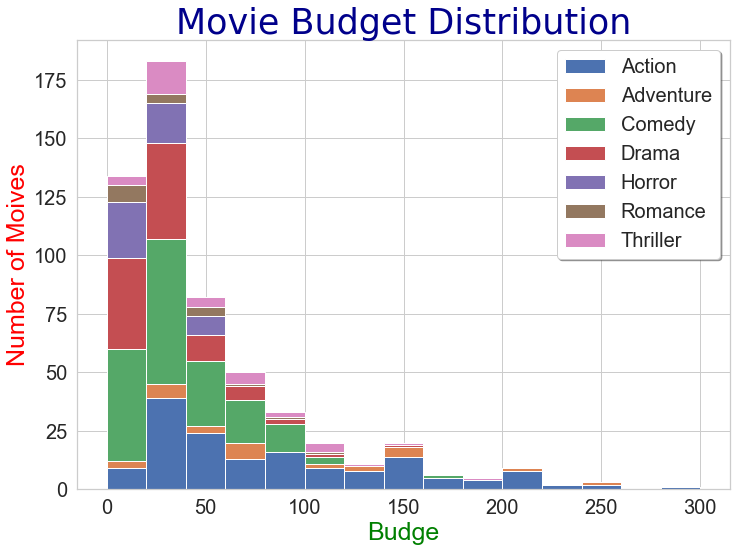

In [142]:
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1,\
        color_codes=False, rc= {'axes.facecolor':'white'})
list2= []
labels=list() 
for i in movies.Genre.cat.categories:
    list2.append(movies[movies.Genre == i].BudgetMillion)
    labels.append(i)
fig, axis = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4 paper
h = plt.hist(list2, stacked=True, bins=15, label=labels, rwidth=1)

# Add title
plt.title('Movie Budget Distribution',fontsize=35, color='DarkBlue', fontname='Console')
#Add labels
plt.xlabel('Budge', fontsize=25, color='Green')
plt.ylabel('Number of Moives', fontsize=25, color="Red")
# tickmark sizes
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#Legend options
plt.legend(prop={'size':20}, frameon=True, fancybox=True, shadow=True,\
          framealpha=1)
plt.show()